# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sinasc = pd.read_csv('SINASC_RO_2019.csv')

sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [60]:
intervalos = [0, 4, 6, 8, 11]
rotulos = ['Asfixia grave', 'Asfixia moderada', 'Asfixia leve', 'Normal']

sinasc['categoria_apgar5'] = pd.cut(sinasc['APGAR5'], bins = intervalos, labels = rotulos)


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

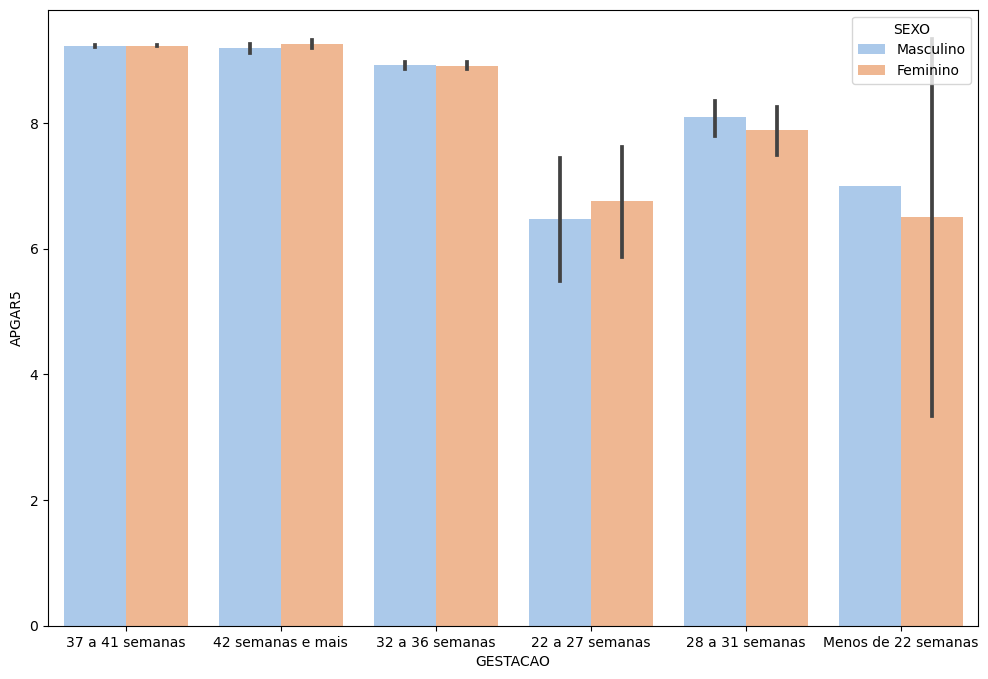

In [25]:
plt.figure(figsize=(12, 8))
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=sinasc)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [26]:
tabela_cruzada = pd.crosstab(index=sinasc['GESTACAO'], columns=sinasc['APGAR5'])

tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [49]:
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100
percentuais_linha = percentuais_linha.round(2)

percentuais_linha.head()

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.24,0.00,9.41,7.06,1.18,0.00,2.35,11.76,28.24,22.35,9.41
28 a 31 semanas,0.00,0.00,1.23,0.62,3.09,4.32,4.32,6.79,37.65,33.95,8.02
32 a 36 semanas,0.09,0.09,0.09,0.09,0.36,0.49,0.76,2.51,16.20,58.50,20.81
37 a 41 semanas,0.02,0.09,0.01,0.02,0.03,0.09,0.20,0.67,6.29,60.23,32.34
42 semanas e mais,0.14,0.00,0.00,0.00,0.00,0.14,0.14,0.72,6.30,60.60,31.95


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Figure size 1200x800 with 0 Axes>

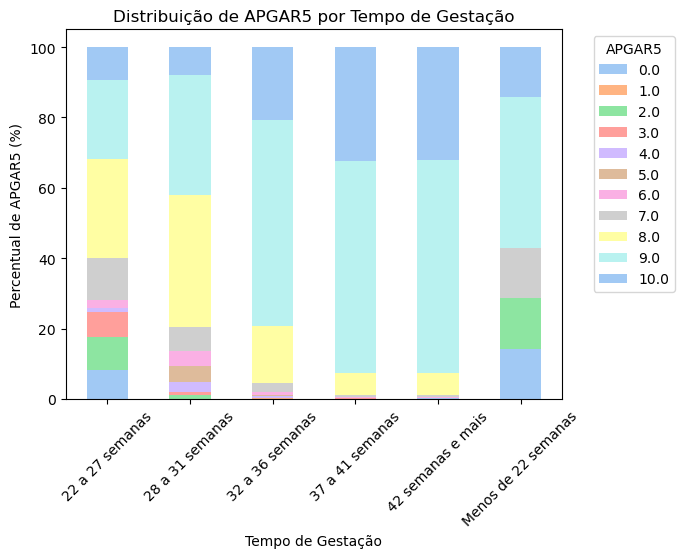

In [67]:
plt.figure(figsize=(12, 8))
percentuais_linha.plot(kind='bar', stacked=True)

plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentual de APGAR5 (%)')
plt.xticks(rotation=45)
plt.legend(title='APGAR5', bbox_to_anchor=(1.05, 1), loc='upper left')


> De fato os dados nos mostram que bebês que nascem em um menor tempo de gestação, tem uma maior chance de atingr um apgar baixo.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

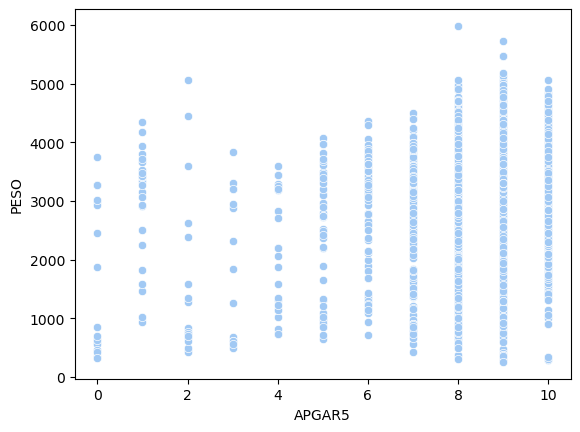

In [61]:
sns.scatterplot(x='APGAR5', y='PESO', data=sinasc)